# Purpose

My original question was "What features are common between houses of similar value and what features makes some properties more valuable than others?" but it eventually changed into "Which areas have a higher median house value and what are possible reasons for this value?"

# Set-Up

In [ ]:
import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
df_cali = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
df_cali

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0




1. **Longitude-** A measure of how far west a house is; a higher value is farther west

2. **Latitude-** A measure of how far north a house is; a higher value is farther north

3. **Housing Median Age-** Median age of a house within a block; a lower number is a newer building

4. **Total Rooms-** Total number of rooms within a block

5. **Total Bedrooms-** Total number of bedrooms within a block

6. **Population-** Total number of people residing within a block

7. **Households-** Total number of households, a group of people residing within a home unit, for a block

8. **Median Income-** Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. **Median House Value-** Median house value for households within a block (measured in US Dollars)



# Plots and Notes

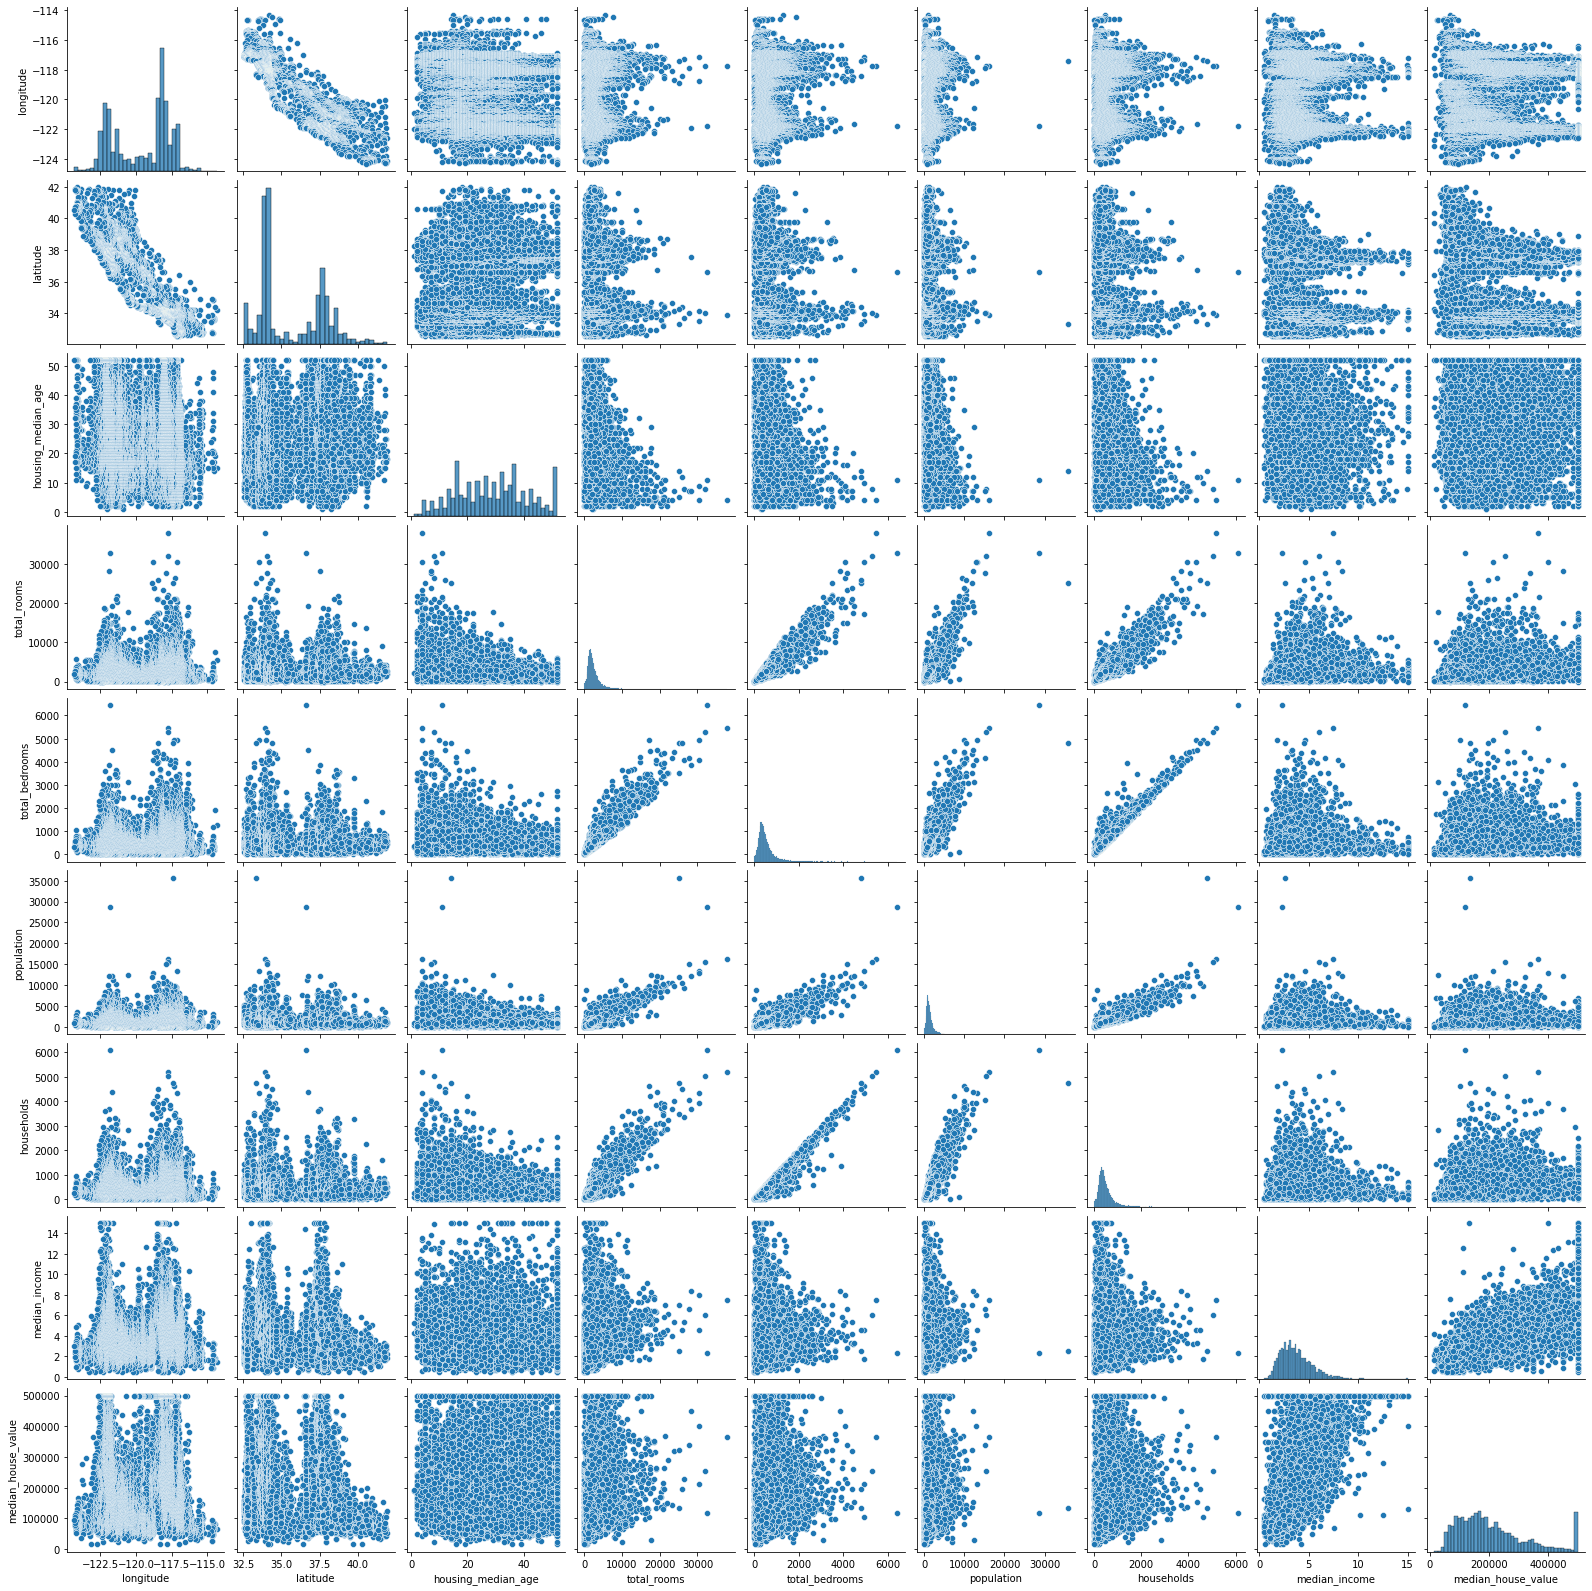

In [ ]:
sns.pairplot(data = df_cali)

Text(0.5, 1.0, 'Households vs. Total Rooms')

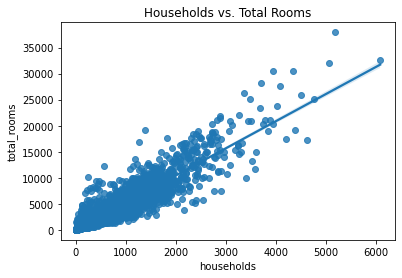

In [ ]:
sns.regplot(data = df_cali, x = "households", y = "total_rooms");
plt.title("Households vs. Total Rooms")

Text(0.5, 1.0, 'Households vs. Total Bedrooms')

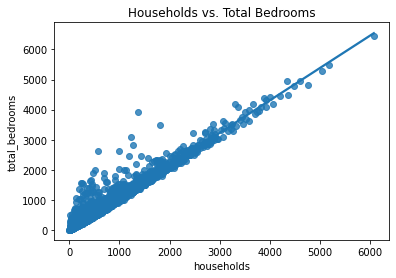

In [ ]:
sns.regplot(data = df_cali, x = "households", y = "total_bedrooms");
plt.title("Households vs. Total Bedrooms")

Text(0.5, 1.0, 'Total Rooms vs. Total Bedrooms')

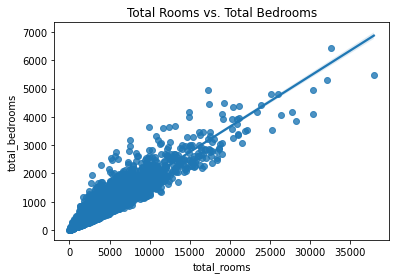

In [ ]:
sns.regplot(data = df_cali, x = "total_rooms", y = "total_bedrooms");
plt.title("Total Rooms vs. Total Bedrooms")

Text(0.5, 1.0, 'Total Rooms vs. Median House Values')

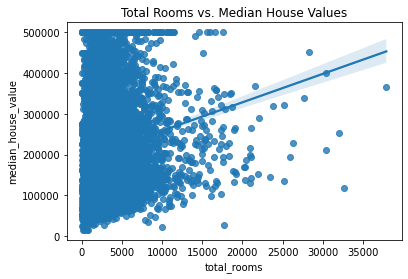

In [ ]:
sns.regplot(data = df_cali, x = "total_rooms", y = "median_house_value");
plt.title("Total Rooms vs. Median House Values")

Text(0.5, 1.0, 'Total Bedrooms vs. Median House Values')

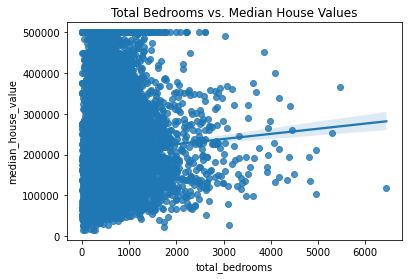

In [ ]:
sns.regplot(data = df_cali, x = "total_bedrooms", y = "median_house_value");
plt.title("Total Bedrooms vs. Median House Values")

**Observations**


---


*   The three graphs above show an almost proportionate relationship and positive correlation between households, total rooms, and total bedrooms. This is expected as as the number of households increases, it is highly likely the the total number of rooms and further, bedrooms, will too

Text(0.5, 1.0, 'Housing Median Age vs. Median House Value')

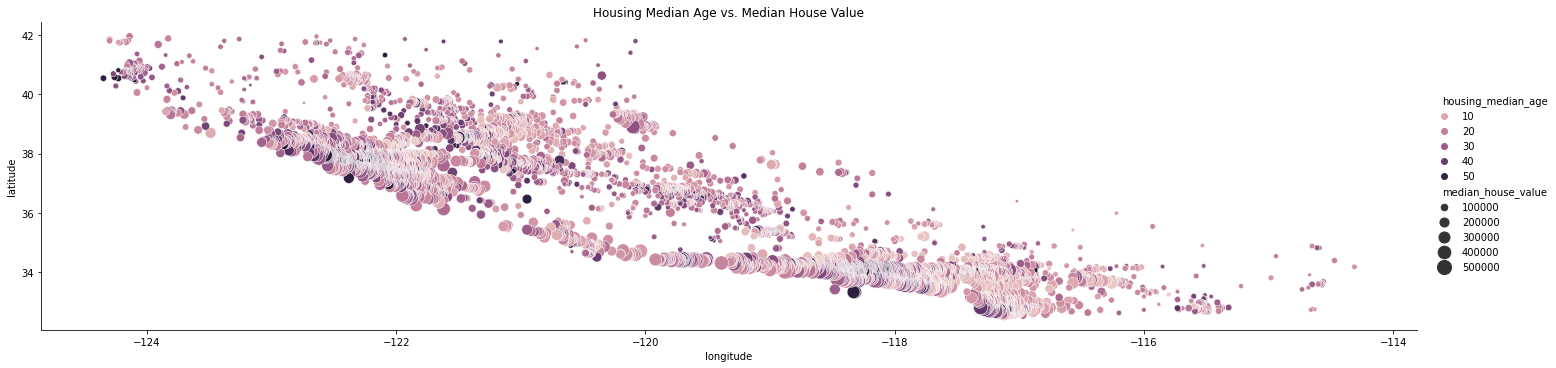

In [ ]:
sns.relplot(data = df_cali, x = "longitude", y = "latitude", hue = "housing_median_age", size = "median_house_value", sizes=(10, 200), height = 5, aspect = 4)
plt.title("Housing Median Age vs. Median House Value")

Although this graph is a bit condensed, making it difficult to view points of high concentration, it shows the necessary data in order to proceed.

Text(0.5, 1.0, 'Housing Median Age vs. Median House Value')

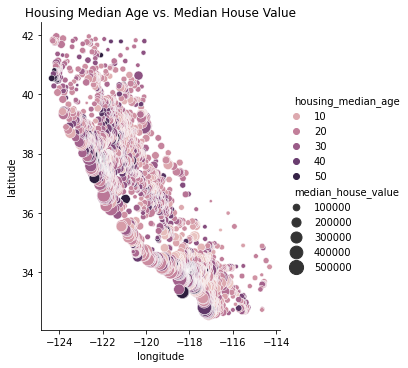

In [ ]:
sns.relplot(data = df_cali, x = "longitude", y = "latitude", hue = "housing_median_age", size = "median_house_value", sizes = (10, 200), height = 5, aspect = 0.85)
plt.title("Housing Median Age vs. Median House Value")

**Observations**


---


*   The areas with the highest median house values are in the following areas with the format of city name, latitude, and longitude:
    * Concord (38, -122)
    * Hacienda Heights (34, -118)
    * Calimesa (34, -117)
    * Santa Cruz (37, -122)
* The median age of the housing in these areas are mainly in the range between 20 to 30

Text(0.5, 1.0, 'Population vs. Median Income')

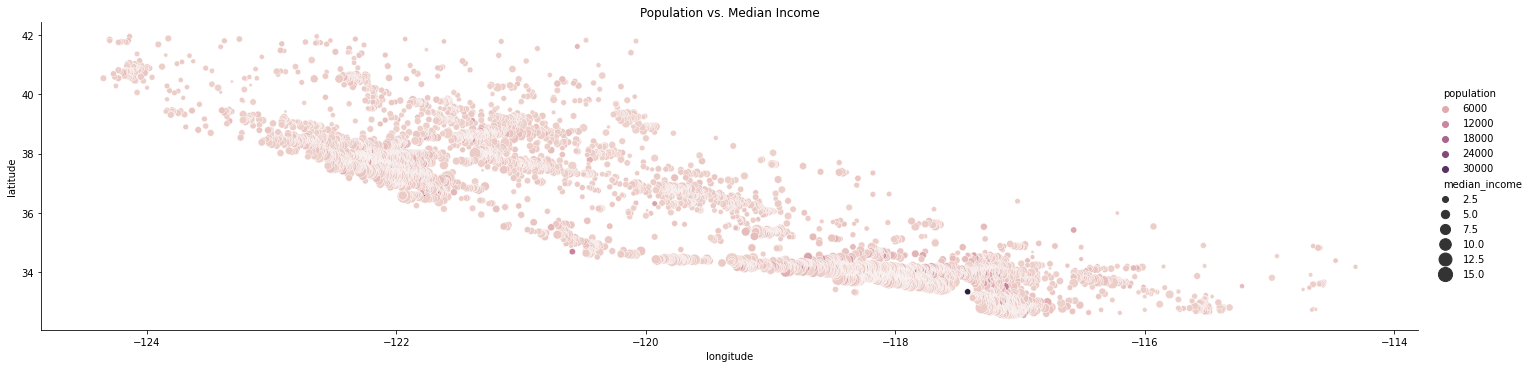

In [ ]:
sns.relplot(data = df_cali, x = "longitude", y = "latitude", hue = "population", size = "median_income", sizes=(10, 200), height = 5, aspect = 4)
plt.title("Population vs. Median Income")

Text(0.5, 1.0, 'Population vs. Median Income')

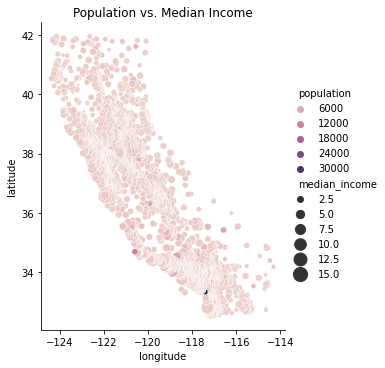

In [ ]:
sns.relplot(data = df_cali, x = "longitude", y = "latitude", hue = "population", size = "median_income", sizes=(10, 200), height = 5, aspect = 0.85)
plt.title("Population vs. Median Income")

**Observations**


---


*   The higher median incomes match the same areas as the areas with the highest median house values. It can logically be assumed that with a higher median income, one would be more interested in buying a house in an area with a higher median house value
* The population in almost all of the areas is 6,000

Text(0.5, 1.0, 'Total Rooms vs. Households')

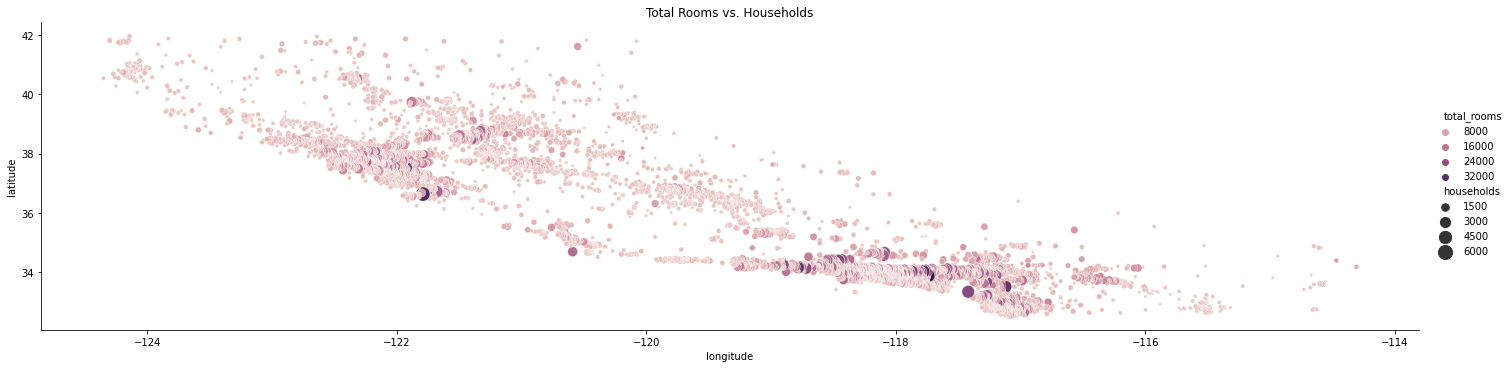

In [ ]:
sns.relplot(data = df_cali, x = "longitude", y = "latitude", hue = "total_rooms", size = "households", sizes=(10, 200), height = 5, aspect = 4)
plt.title("Total Rooms vs. Households")

Text(0.5, 1.0, 'Total Rooms vs. Households')

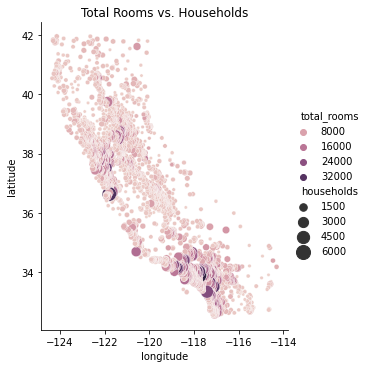

In [ ]:
sns.relplot(data = df_cali, x = "longitude", y = "latitude", hue = "total_rooms", size = "households", sizes = (10, 200), height = 5, aspect = 0.85)
plt.title("Total Rooms vs. Households")

**Observations**


---


* The higher the number of households, the higher the median house value, as seen through the first and third graphs
* In the first graph, the area near (39, -121) has a much more diverse range of median house values and is harder to notice compared to other areas. Similarily, in the second graph, the specified area is still harder to notice. However, in the third graph, it is comparably much easier to notice said area because it has a greater amount of households compared to its surrounding areas as well as a more diverse range of total rooms
* The areas with higher median house values have a larger variety of total rooms compared to areas with lower median house values. However, most areas have around 8,000 total rooms
* Most likely, the areas with a higher median income would be more desirable, resulting in a higher number of households
* The cities that had a higher median house value have more "green", natural areas and are near water bodies

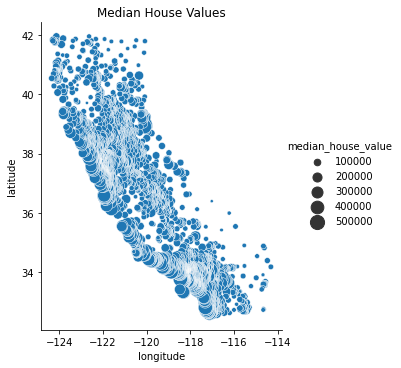

In [ ]:
sns.relplot(data = df_cali, x = "longitude", y = "latitude", size = "median_house_value", sizes = (10, 200), height = 5, aspect = 0.85)
plt.title("Median House Values")
fig = plt.gcf()
fig.savefig("California Median House Values", dpi = 750)

# Machine Learning

The target is the median house value and the features are the remaining columns/features

In [ ]:
true_price = df_cali["median_house_value"]

In [ ]:
df_cali_copy = df_cali.copy()

In [ ]:
df_cali_copy = df_cali_copy.drop(columns = ["median_house_value"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cali_copy, true_price, test_size = 0.20, random_state = 0)

### LinearRegression

In [ ]:
cali_linear_m = linear_model.LinearRegression()

In [ ]:
cali_linear_m.fit(X = X_train, y = y_train)

LinearRegression()

In [ ]:
train_linear_pred = cali_linear_m.predict(X = X_train)

In [ ]:
test_linear_pred = cali_linear_m.predict(X = X_test)

In [ ]:
mean_absolute_error(y_true = y_train, y_pred = train_linear_pred)

51030.92291202648

In [ ]:
sq_er_linear_train = mean_squared_error(y_true = y_train, y_pred = train_linear_pred)

In [ ]:
math.sqrt(sq_er_linear_train)

69622.21091466476

In [ ]:
mean_absolute_error(y_true = y_test, y_pred = test_linear_pred)

50142.797420823226

In [ ]:
sq_er_linear_test = mean_squared_error(y_true = y_test, y_pred = test_linear_pred)

In [ ]:
math.sqrt(sq_er_linear_test)

68833.25637469906

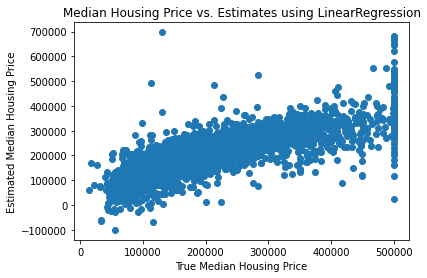

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, test_linear_pred)
plt.title("Median Housing Price vs. Estimates using LinearRegression")
plt.xlabel("True Median Housing Price")
plt.ylabel("Estimated Median Housing Price")
plt.show()

In [ ]:
cali_linear_m.coef_

array([-4.33863939e+04, -4.31113378e+04,  1.15576940e+03, -9.28217711e+00,
        1.23826022e+02, -3.71486621e+01,  4.07777661e+01,  4.05767360e+04])

### Lasso

In [ ]:
cali_lasso_m = linear_model.Lasso(alpha = 100)

In [ ]:
cali_lasso_m.fit(X = X_train, y = y_train)

Lasso(alpha=100)

In [ ]:
train_lasso_pred = cali_lasso_m.predict(X = X_train)

In [ ]:
test_lasso_pred = cali_lasso_m.predict(X = X_test)

In [ ]:
mean_absolute_error(y_true = y_train, y_pred = train_lasso_pred)

51026.031164343

In [ ]:
sq_er_lasso_train = mean_squared_error(y_true = y_train, y_pred = train_lasso_pred)

In [ ]:
math.sqrt(sq_er_lasso_train)

69622.71950834089

In [ ]:
mean_absolute_error(y_true = y_test, y_pred = test_lasso_pred)

50135.08775937625

In [ ]:
sq_er_lasso_test = mean_squared_error(y_true = y_test, y_pred = test_lasso_pred)

In [ ]:
math.sqrt(sq_er_lasso_test)

68830.00221713482

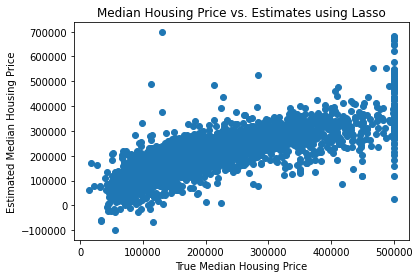

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, test_lasso_pred)
plt.title("Median Housing Price vs. Estimates using Lasso")
plt.xlabel("True Median Housing Price")
plt.ylabel("Estimated Median Housing Price")
plt.show()

In [ ]:
cali_lasso_m.coef_

array([-4.30067041e+04, -4.27572024e+04,  1.16112609e+03, -9.31365751e+00,
        1.23273132e+02, -3.71600065e+01,  4.16452469e+01,  4.05966570e+04])

### RandomForestRegressor

In [ ]:
cali_forest_m = RandomForestRegressor(n_estimators = 50, min_samples_split = 10)

In [ ]:
cali_forest_m.fit(X = X_train, y = y_train)

RandomForestRegressor(min_samples_split=10, n_estimators=50)

In [ ]:
train_forest_pred = cali_forest_m.predict(X_train)

In [ ]:
test_forest_pred = cali_forest_m.predict(X_test)

In [ ]:
mean_absolute_error(y_true = y_train, y_pred = train_forest_pred)

18589.538485745667

In [ ]:
sq_er_forest_train = mean_squared_error(y_true = y_train, y_pred = train_forest_pred)

In [ ]:
math.sqrt(sq_er_forest_train)

28579.418360579304

In [ ]:
mean_absolute_error(y_true = y_test, y_pred = test_forest_pred)

31947.95409851965

In [ ]:
sq_er_forest_test = mean_squared_error(y_true = y_test, y_pred = test_forest_pred)

In [ ]:
math.sqrt(sq_er_forest_test)

48687.328439138706

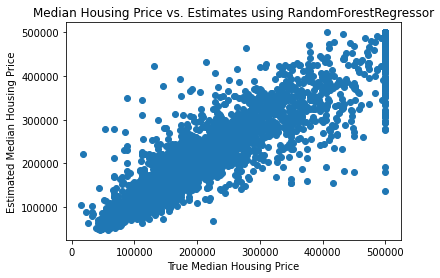

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, test_forest_pred)
plt.title("Median Housing Price vs. Estimates using RandomForestRegressor")
plt.xlabel("True Median Housing Price")
plt.ylabel("Estimated Median Housing Price")
plt.show()

### MLPRegressor

In [ ]:
cali_neural_m = MLPRegressor(hidden_layer_sizes = [100, 50], activation = "tanh", solver = "sgd")

In [ ]:
cali_neural_m.fit(X = X_train, y = y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=[100, 50], solver='sgd')

In [ ]:
train_neural_pred = cali_neural_m.predict(X_train)

In [ ]:
test_neural_pred = cali_neural_m.predict(X_test)

In [ ]:
mean_absolute_error(y_true = y_train, y_pred = train_neural_pred)

91729.83878842319

In [ ]:
sq_er_neural_train = mean_squared_error(y_true = y_train, y_pred = train_neural_pred)

In [ ]:
math.sqrt(sq_er_neural_train)

116587.87487640425

In [ ]:
mean_absolute_error(y_true = y_test, y_pred = test_neural_pred)

90560.79027382303

In [ ]:
sq_er_neural_test = mean_squared_error(y_true = y_test, y_pred = test_neural_pred)

In [ ]:
math.sqrt(sq_er_neural_test)

113531.81869250535

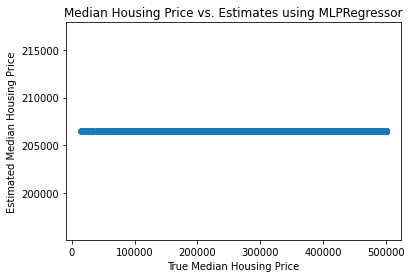

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, test_neural_pred)
plt.title("Median Housing Price vs. Estimates using MLPRegressor")
plt.xlabel("True Median Housing Price")
plt.ylabel("Estimated Median Housing Price")
plt.show()

RandomForestRegressor and MLPRegressor had the lowest errors compared to LinearRegression and Lasso.

The calculated errors, technically ranging from about \$18,000 to \$70,000, are satisfactory. Although some are a bit high, it is relatively accurate as housing prices can often fluctuate by around this amount. Therefore, this error is fair.

# Conclusion

In the LinearRegression and Lasso models, longitude, latitude, and median income were the factors affecting the median house value the most, instead of more expected factors like total rooms.

This means that in California, the location of the house and median income of the area are the largest-impacting aspects on the median house value.